In [1]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

2022-10-24 22:17:24.192752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 22:17:24.314655: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-24 22:17:24.314668: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-24 22:17:24.336051: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-24 22:17:24.931879: W tensorflow/stream_executor/platform/de

In [3]:
print(x_train[1].shape)


(28, 28)


In [2]:
classnames = ["T_shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

classnames[y_train[0]]
y_train.shape

(60000,)

Dress


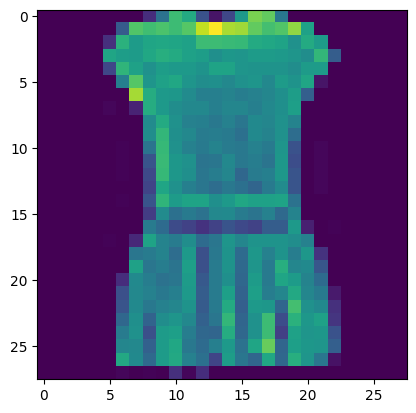

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])
print(classnames[y_train[3]])
plt.show()

In [4]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Flatten(input_shape=[28,28]))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


2022-10-24 22:17:34.208005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-24 22:17:34.208314: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-24 22:17:34.208350: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dauphongtantan): /proc/driver/nvidia/version does not exist
2022-10-24 22:17:34.209045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer= "rmsprop",loss = "categorical_crossentropy",metrics=["accuracy"])

In [6]:
x_train= x_train.astype("float32")/255
x_test= x_test.astype("float32")/255

In [7]:
print(x_train[5])

[[0.         0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.08627451 0.34509805 0.7372549
  0.6745098  0.5176471  0.49019608 0.5529412  0.78039217 0.56078434
  0.03529412 0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.07843138 0.5137255  0.78039217 0.80784315 0.76862746 0.7921569
  0.9490196  1.         1.         0.98039216 0.87058824 0.77254903
  0.80784315 0.7372549  0.49411765 0.06666667 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.13725491
  0.8392157  0.7490196  0.7176471  0.69803923 0.6862745  0.65882355
  0.5882353  0.63529414 0.62352943 0.59607846 0.61960787 0.7019608
  0.7176471  0.7411765  0.7647059  0.7254902  0.32156864 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.6666667
  0.74509805 0.6745

In [8]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [9]:
model.fit(x_train,y_train,epochs =200,batch_size =128,validation_data=(x_test,y_test))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.5499 - accuracy: 0.8005 - val_loss: 0.4504 - val_accuracy: 0.8354
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3805 - accuracy: 0.8587 - val_loss: 0.3958 - val_accuracy: 0.8604
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3368 - accuracy: 0.8760 - val_loss: 0.4212 - val_accuracy: 0.8404
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 0.3110 - accuracy: 0.8839 - val_loss: 0.3815 - val_accuracy: 0.8671
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2929 - accuracy: 0.8906 - val_loss: 0.4706 - val_accuracy: 0.8321
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2784 - accuracy: 0.8964 - val_loss: 0.4049 - val_accuracy: 0.8623
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2683 - accuracy: 0.9002 - val_loss: 0.3461 - val_accuracy: 0.8813

KeyboardInterrupt: 

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


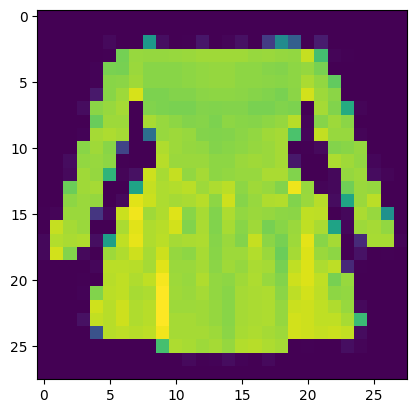

In [142]:
import numpy as np
from keras.utils.image_utils import load_img,img_to_array
image = load_img("image_test/download.jpeg",target_size=(28,28),color_mode = "grayscale")
img= img_to_array(image)
img = 1-img/255
plt.imshow(img)

print(y_test[20])

In [147]:
import numpy as np




tag = np.argmax(model.predict(img),axis=1)
print(classnames[tag[0]])


1/1 [==============================] - 0s 13ms/step
Shirt
